In [74]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
import networkx as nx
from collections import defaultdict
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community import louvain_communities
from networkx.algorithms.community import modularity
from infomap import Infomap
from mycolorpy import colorlist as mcp
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')

In [3]:
nodes_file = 'fb-pages-food.nodes'
nodes_df = pd.read_csv(nodes_file)

new_column_names = {
    'id': 'old id',
    'name': 'page name',
    'new_id': 'id'
}

nodes_df.rename(columns=new_column_names, inplace=True)

nodes_df = nodes_df.drop(['old id'], axis=1)

In [4]:
nodes_df.head()

,page name,id
0,Josh Marks,386
1,Blue Ribbon Restaurants,473
2,Pat Neely,1
3,La Griglia,542
4,Jose Garces,189


In [5]:
edges_file = 'fb-pages-food.edges'
edges_df = pd.read_csv(edges_file, names=['source', 'target'])

In [6]:
edges_df.head()

,source,target
0,0,276
1,0,58
2,0,132
3,0,603
4,0,398


In [7]:
G = nx.Graph()

for _, node_data in nodes_df.iterrows():
    G.add_node(node_data['id'], name=node_data['page name'])

for _, edge_data in edges_df.iterrows():
    G.add_edge(edge_data['source'], edge_data['target'])

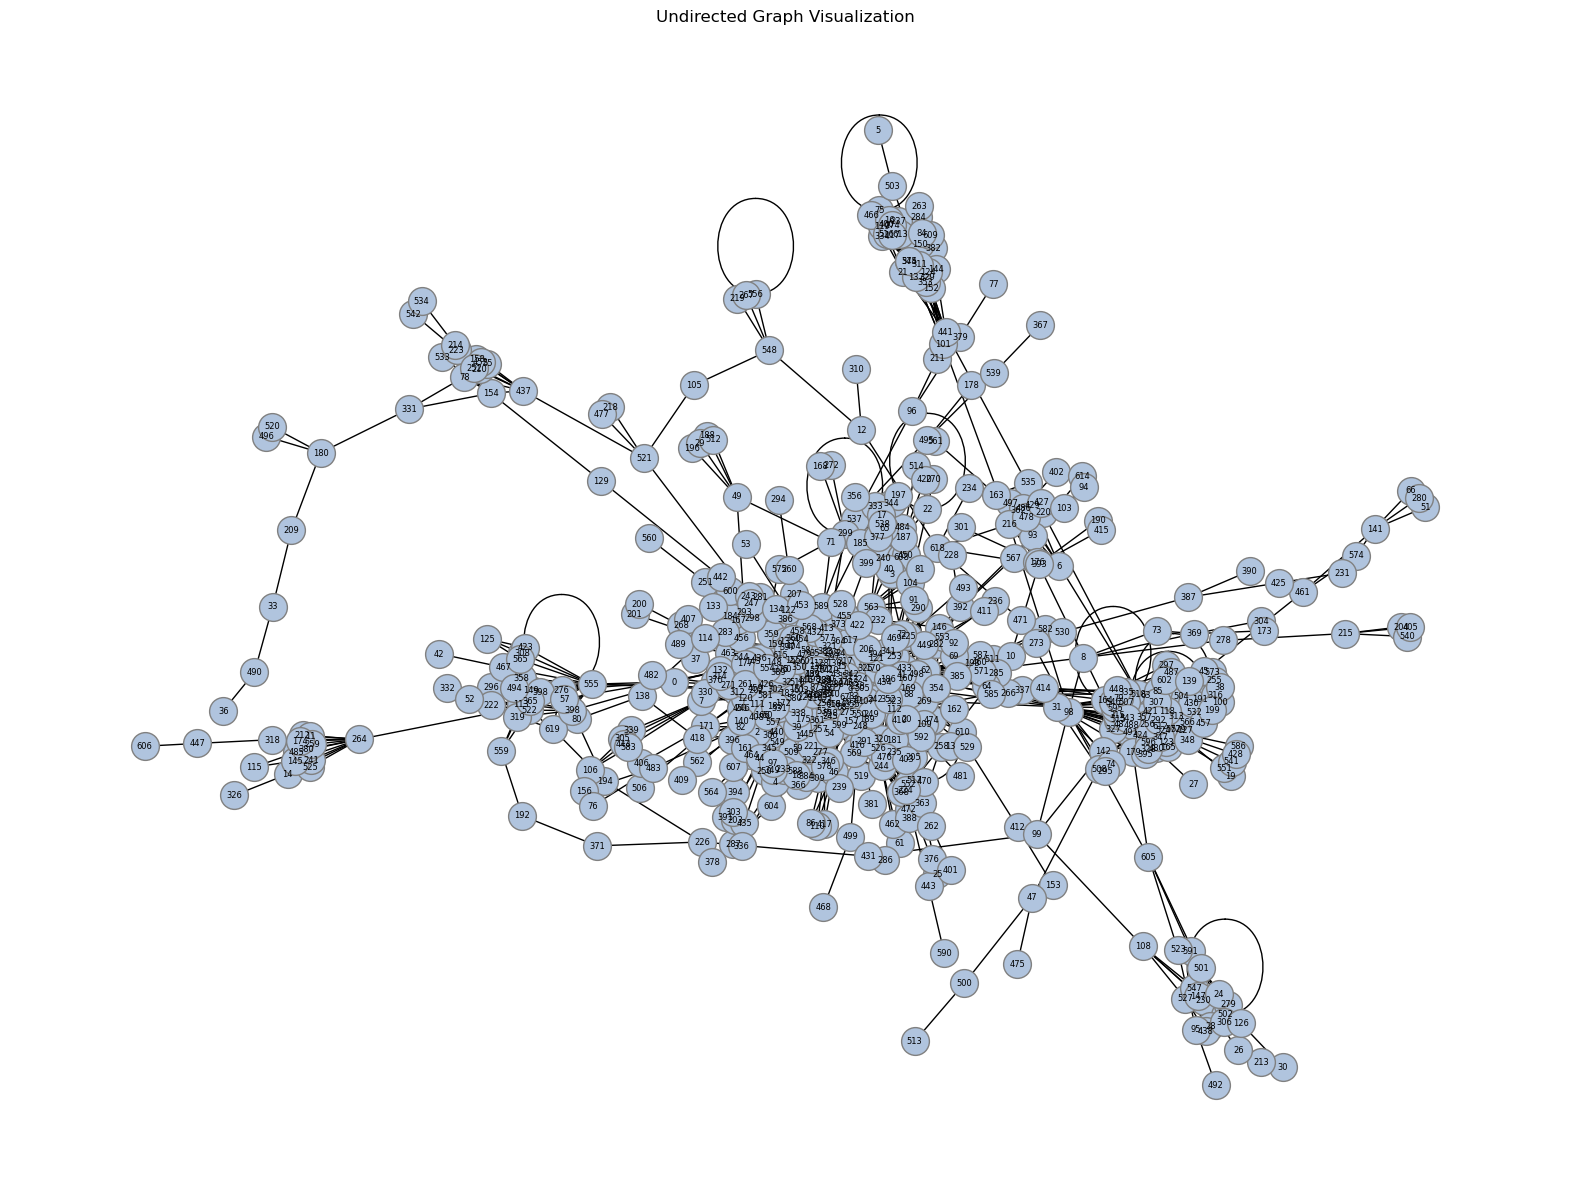

In [8]:
plt.figure(figsize=(20, 15))
pos = nx.spring_layout(G)

nodes = nx.draw_networkx_nodes(G, pos, node_size=400, node_color='lightsteelblue')
nodes.set_edgecolor('grey')

nx.draw_networkx_edges(G, pos, width=1.0, edge_color='black')

nx.draw_networkx_labels(G, pos, font_size=6, font_color='black')

plt.title("Undirected Graph Visualization")
plt.axis('off')
plt.show()

# Descriptive analysis

### Adjacency matrix

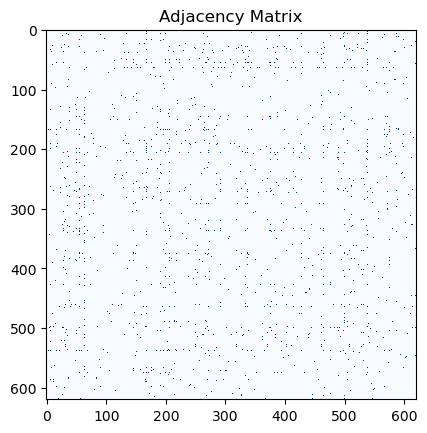

In [9]:
adj_matrix = nx.to_numpy_matrix(G)

plt.imshow(adj_matrix, cmap='Blues', interpolation='none')
plt.title('Adjacency Matrix')
plt.show()

### Loops

In [10]:
num_loops = nx.number_of_selfloops(G)
print(f"Number of loops in the graph: {num_loops}")

Number of loops in the graph: 11


In [11]:
G.remove_edges_from(nx.selfloop_edges(G))

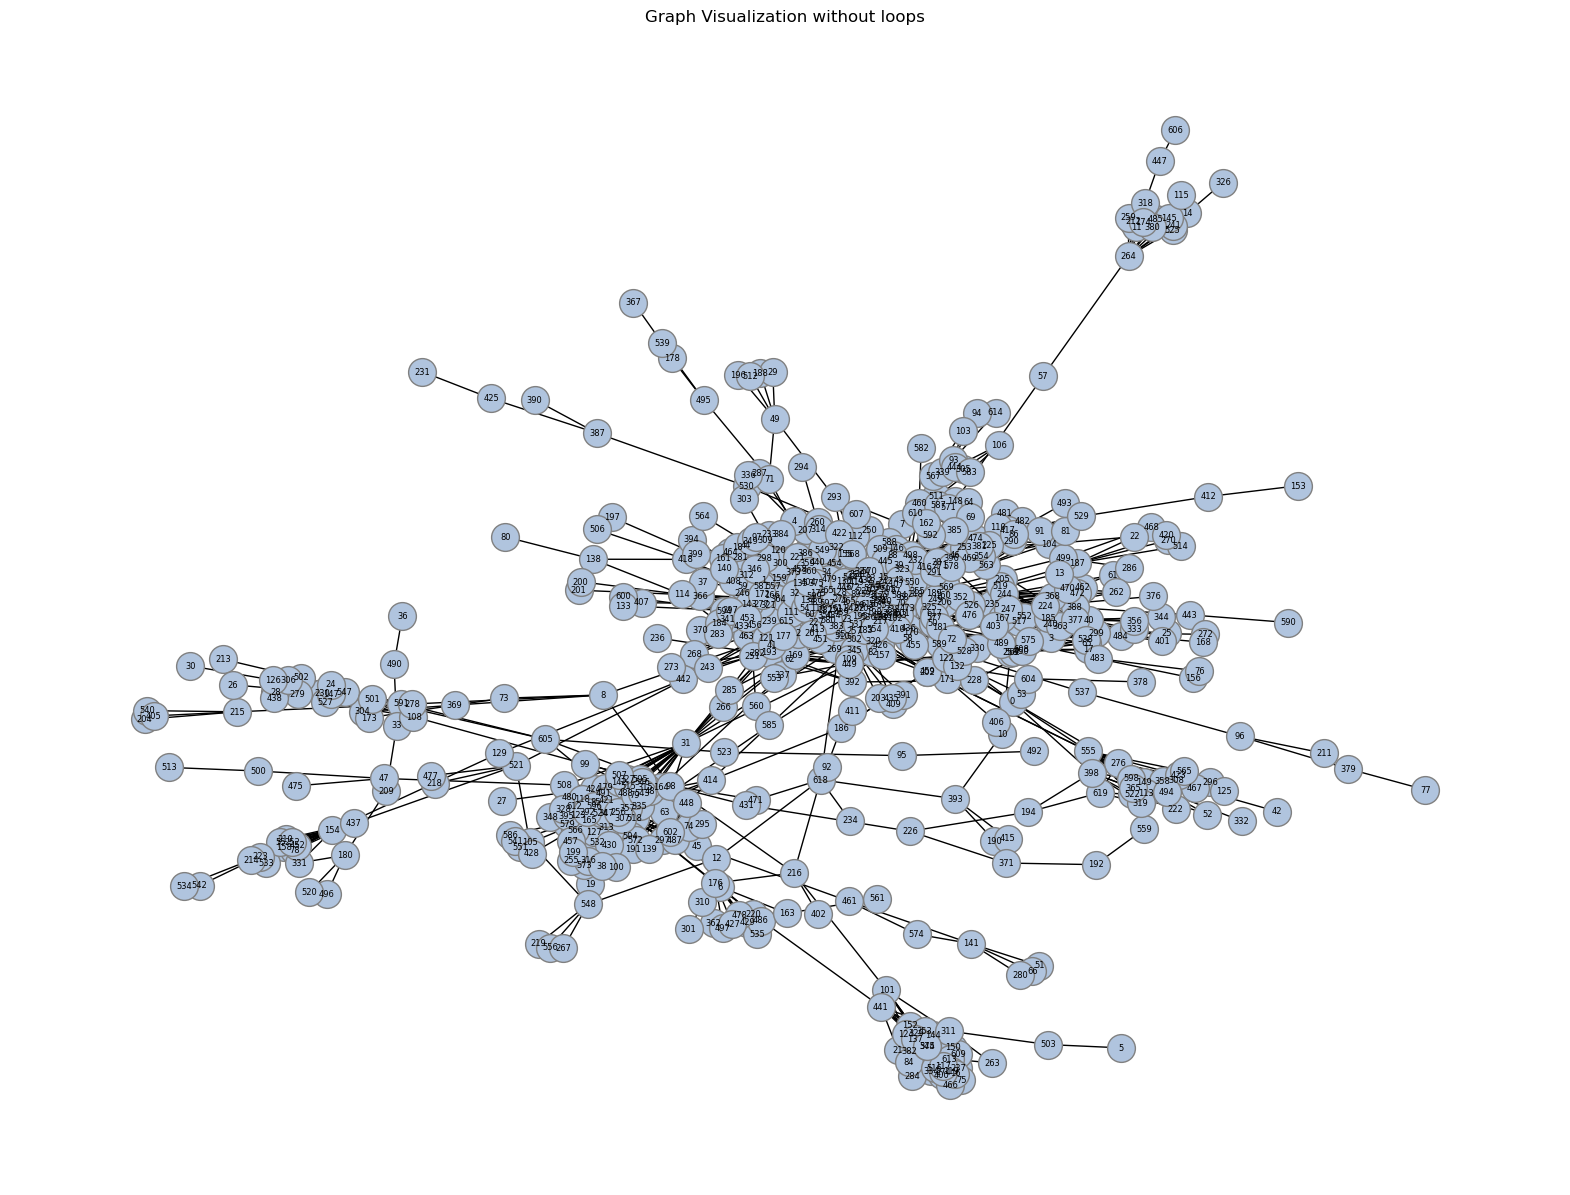

In [12]:
plt.figure(figsize=(20, 15))
pos = nx.spring_layout(G)

nodes = nx.draw_networkx_nodes(G, pos, node_size=400, node_color='lightsteelblue')
nodes.set_edgecolor('grey')

nx.draw_networkx_edges(G, pos, width=1.0, edge_color='black')

nx.draw_networkx_labels(G, pos, font_size=6, font_color='black')

plt.title("Graph Visualization without loops")
plt.axis('off')
plt.show()

### N, L
### Average degree
### Density

In [13]:
num_nodes = len(G.nodes)
num_edges = len(G.edges)
density = nx.density(G)

all_degrees = [degree for node, degree in G.degree()]
average_degree = sum(all_degrees) / len(all_degrees)

print(f"Network order (number of nodes): {num_nodes}")
print(f"Network size (number of edges): {num_edges}")
print(f"Average degree of the Network: {average_degree:.3f}")
print(f"Density: {density:.4f}")

Network order (number of nodes): 620
Network size (number of edges): 2091
Average degree of the Network: 6.745
Density: 0.0109


### Degree distribution

Follows the power-degree distribution

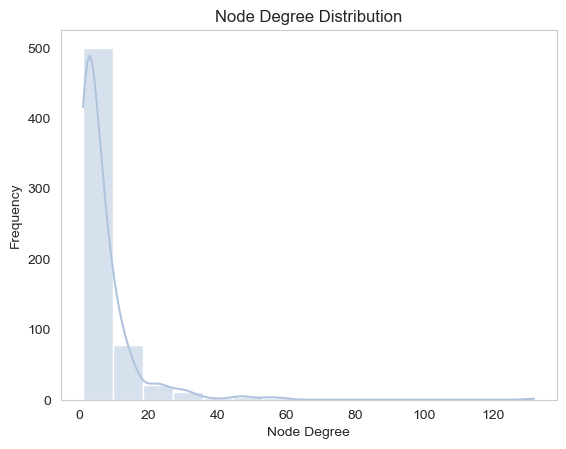

In [14]:
sns.set_style("whitegrid", {'axes.grid' : False})
sns.histplot(all_degrees, bins=15, kde=True, color='lightsteelblue')
plt.title("Node Degree Distribution")
plt.xlabel("Node Degree")
plt.ylabel("Frequency")

plt.show()

### Centrality

normalized by the maximum possible degree (in a simple graph, therefore were deleted loops)

In [15]:
degree_centrality = dict(sorted(nx.degree_centrality(G).items(), key=lambda item: item[1], reverse=True))

print("Degree Centrality:")
for key, value in degree_centrality.items():
    print(f"{key}: {round(value, 3)}")

Degree Centrality:
265: 0.213
518: 0.095
67: 0.09
340: 0.089
90: 0.082
56: 0.076
70: 0.076
611: 0.076
89: 0.069
288: 0.06
505: 0.057
498: 0.053
317: 0.052
217: 0.05
182: 0.05
229: 0.05
87: 0.048
389: 0.048
524: 0.047
198: 0.047
9: 0.045
603: 0.044
289: 0.042
357: 0.042
131: 0.042
248: 0.04
31: 0.04
350: 0.039
597: 0.037
343: 0.037
616: 0.037
35: 0.036
164: 0.036
434: 0.036
601: 0.036
116: 0.036
545: 0.036
374: 0.036
550: 0.034
151: 0.034
446: 0.032
352: 0.031
576: 0.027
555: 0.027
254: 0.027
526: 0.027
465: 0.026
128: 0.026
253: 0.026
613: 0.026
372: 0.026
235: 0.024
491: 0.024
584: 0.024
58: 0.024
245: 0.024
432: 0.024
227: 0.024
181: 0.024
224: 0.024
593: 0.023
23: 0.023
195: 0.023
50: 0.023
136: 0.023
570: 0.023
404: 0.023
334: 0.021
230: 0.021
563: 0.021
238: 0.021
143: 0.021
558: 0.021
41: 0.021
516: 0.021
117: 0.021
311: 0.021
154: 0.019
329: 0.019
179: 0.019
107: 0.019
323: 0.019
264: 0.019
400: 0.019
119: 0.019
135: 0.019
16: 0.019
397: 0.019
274: 0.019
43: 0.019
494: 0.019
62:

In [16]:
betweenness_centrality = dict(sorted(nx.betweenness_centrality(G).items(), key=lambda item: item[1], reverse=True))

print("Betweenness Centrality:")
for key, value in betweenness_centrality.items():
    print(f"{key}: {round(value, 3)}")

Betweenness Centrality:
265: 0.35
31: 0.162
518: 0.145
618: 0.093
35: 0.091
216: 0.079
498: 0.072
101: 0.058
217: 0.057
148: 0.057
555: 0.056
449: 0.054
434: 0.054
8: 0.053
605: 0.052
585: 0.052
57: 0.05
243: 0.049
264: 0.048
41: 0.047
521: 0.047
340: 0.044
67: 0.043
220: 0.042
169: 0.042
98: 0.04
70: 0.039
179: 0.038
352: 0.037
164: 0.035
611: 0.034
58: 0.034
154: 0.034
437: 0.033
442: 0.032
441: 0.031
129: 0.029
202: 0.029
459: 0.029
0: 0.028
337: 0.027
71: 0.027
501: 0.026
90: 0.025
248: 0.025
524: 0.025
269: 0.024
227: 0.024
331: 0.022
545: 0.022
374: 0.022
288: 0.022
176: 0.022
99: 0.022
56: 0.021
389: 0.021
383: 0.021
505: 0.02
146: 0.019
180: 0.019
45: 0.019
50: 0.019
186: 0.018
7: 0.018
603: 0.017
461: 0.016
397: 0.015
253: 0.015
414: 0.015
142: 0.015
157: 0.015
12: 0.014
224: 0.014
508: 0.014
526: 0.013
181: 0.013
49: 0.013
537: 0.013
530: 0.013
278: 0.013
357: 0.013
311: 0.013
187: 0.012
89: 0.012
114: 0.012
398: 0.012
193: 0.012
229: 0.011
597: 0.011
6: 0.011
577: 0.011
548:

In [17]:
closeness_centrality = dict(sorted(nx.closeness_centrality(G).items(), key=lambda item: item[1], reverse=True))

print("Closeness Centrality:")
for key, value in closeness_centrality.items():
    print(f"{key}: {round(value, 3)}")

Closeness Centrality:
265: 0.331
611: 0.303
70: 0.298
90: 0.298
56: 0.295
217: 0.292
505: 0.291
67: 0.291
340: 0.289
248: 0.288
41: 0.288
317: 0.288
87: 0.287
288: 0.287
198: 0.285
449: 0.285
131: 0.285
35: 0.285
434: 0.284
169: 0.284
597: 0.281
601: 0.281
89: 0.28
465: 0.28
229: 0.279
350: 0.278
352: 0.278
9: 0.277
238: 0.276
498: 0.274
599: 0.274
289: 0.274
58: 0.274
439: 0.273
343: 0.273
245: 0.271
576: 0.271
116: 0.27
107: 0.27
616: 0.27
195: 0.27
603: 0.27
584: 0.269
383: 0.268
446: 0.268
62: 0.268
182: 0.268
397: 0.268
242: 0.268
372: 0.267
269: 0.267
121: 0.267
321: 0.266
68: 0.266
227: 0.266
254: 0.266
183: 0.266
43: 0.266
570: 0.266
23: 0.265
338: 0.265
389: 0.265
15: 0.265
31: 0.265
151: 0.265
351: 0.265
275: 0.264
404: 0.264
88: 0.264
558: 0.264
594: 0.263
148: 0.263
433: 0.263
243: 0.263
419: 0.263
578: 0.262
181: 0.262
157: 0.262
510: 0.26
257: 0.26
531: 0.26
577: 0.259
83: 0.258
323: 0.257
128: 0.257
7: 0.257
112: 0.257
479: 0.257
585: 0.257
146: 0.257
432: 0.256
102: 0.2

In [18]:
eigenvector_centrality = dict(sorted(nx.eigenvector_centrality(G).items(), key=lambda item: item[1], reverse=True))

print("Eigenvector Centrality:")
for key, value in eigenvector_centrality.items():
    print(f"{key}: {round(value, 3)}")

Eigenvector Centrality:
265: 0.313
90: 0.223
340: 0.222
67: 0.209
56: 0.207
611: 0.186
89: 0.181
70: 0.177
317: 0.163
505: 0.158
288: 0.15
9: 0.146
229: 0.145
87: 0.145
198: 0.142
131: 0.136
217: 0.13
289: 0.13
182: 0.125
603: 0.118
601: 0.118
597: 0.117
350: 0.113
248: 0.112
616: 0.109
151: 0.106
116: 0.106
343: 0.103
35: 0.101
446: 0.101
434: 0.101
465: 0.095
550: 0.093
372: 0.087
389: 0.087
254: 0.087
351: 0.084
570: 0.081
584: 0.078
58: 0.076
68: 0.074
238: 0.073
576: 0.073
245: 0.072
593: 0.072
128: 0.07
107: 0.069
195: 0.067
15: 0.066
439: 0.064
498: 0.062
275: 0.062
558: 0.062
23: 0.058
419: 0.057
43: 0.056
130: 0.055
136: 0.055
324: 0.054
342: 0.054
352: 0.053
432: 0.051
323: 0.05
50: 0.049
338: 0.048
242: 0.048
208: 0.046
383: 0.046
404: 0.045
227: 0.045
83: 0.044
361: 0.044
375: 0.044
479: 0.042
577: 0.042
102: 0.042
355: 0.041
473: 0.041
60: 0.039
181: 0.039
189: 0.038
249: 0.038
157: 0.038
580: 0.038
300: 0.036
345: 0.036
155: 0.036
599: 0.036
536: 0.035
41: 0.035
32: 0.034

In [19]:
pagerank_centrality  = dict(sorted(nx.pagerank(G).items(), key=lambda item: item[1], reverse=True))

print("PageRank Centrality:")
for key, value in pagerank_centrality.items():
    print(f"{key}: {round(value, 3)}")

PageRank Centrality:
265: 0.025
518: 0.015
67: 0.009
340: 0.008
90: 0.008
70: 0.008
611: 0.008
498: 0.007
524: 0.007
56: 0.007
89: 0.007
357: 0.006
288: 0.006
505: 0.006
31: 0.005
389: 0.005
182: 0.005
229: 0.005
164: 0.005
217: 0.005
317: 0.005
555: 0.005
87: 0.005
198: 0.004
248: 0.004
603: 0.004
9: 0.004
131: 0.004
289: 0.004
350: 0.004
545: 0.004
374: 0.004
352: 0.004
35: 0.004
264: 0.004
230: 0.004
224: 0.004
597: 0.004
601: 0.004
616: 0.004
116: 0.004
434: 0.004
526: 0.004
253: 0.004
343: 0.004
491: 0.003
494: 0.003
550: 0.003
548: 0.003
151: 0.003
49: 0.003
154: 0.003
235: 0.003
446: 0.003
141: 0.003
147: 0.003
50: 0.003
563: 0.003
227: 0.003
181: 0.003
98: 0.003
299: 0.003
485: 0.003
522: 0.003
397: 0.003
478: 0.003
143: 0.003
311: 0.003
179: 0.003
113: 0.003
254: 0.003
58: 0.003
613: 0.003
576: 0.003
432: 0.003
41: 0.003
618: 0.003
501: 0.003
372: 0.003
404: 0.003
345: 0.003
547: 0.003
180: 0.003
584: 0.003
63: 0.003
449: 0.003
245: 0.003
128: 0.003
276: 0.003
282: 0.003
363: 

### Connectivity

In [20]:
connected_components = list(nx.connected_components(G))
largest_component = max(connected_components, key=len)

print(f"Number of connected components: {nx.number_connected_components(G)}")
print(f"Size of the largest connected component: {len(largest_component)}")

Number of connected components: 1
Size of the largest connected component: 620


### Transitivity (Clustering coefficient)

In [20]:
local_clustering_coefficients = dict(sorted(nx.clustering(G).items(), key=lambda item: item[1], reverse=True))
for node, lcc in local_clustering_coefficients.items():
    print(f"Node {node}: lcc {lcc:.3f}")

Node 1: lcc 1.000
Node 533: lcc 1.000
Node 594: lcc 1.000
Node 246: lcc 1.000
Node 504: lcc 1.000
Node 472: lcc 1.000
Node 588: lcc 1.000
Node 165: lcc 1.000
Node 204: lcc 1.000
Node 270: lcc 1.000
Node 322: lcc 1.000
Node 532: lcc 1.000
Node 615: lcc 1.000
Node 486: lcc 1.000
Node 525: lcc 1.000
Node 417: lcc 1.000
Node 263: lcc 1.000
Node 241: lcc 1.000
Node 549: lcc 1.000
Node 279: lcc 1.000
Node 388: lcc 1.000
Node 610: lcc 1.000
Node 28: lcc 1.000
Node 587: lcc 1.000
Node 297: lcc 1.000
Node 487: lcc 1.000
Node 59: lcc 1.000
Node 574: lcc 1.000
Node 73: lcc 1.000
Node 110: lcc 1.000
Node 589: lcc 1.000
Node 75: lcc 1.000
Node 571: lcc 1.000
Node 348: lcc 1.000
Node 438: lcc 1.000
Node 191: lcc 1.000
Node 91: lcc 1.000
Node 430: lcc 1.000
Node 120: lcc 1.000
Node 2: lcc 1.000
Node 466: lcc 1.000
Node 316: lcc 1.000
Node 81: lcc 1.000
Node 178: lcc 1.000
Node 259: lcc 1.000
Node 455: lcc 1.000
Node 420: lcc 1.000
Node 256: lcc 1.000
Node 457: lcc 1.000
Node 602: lcc 1.000
Node 203: 

In [21]:
df = pd.DataFrame(list(local_clustering_coefficients.items()), columns=['Node', 'LCC'])

frequency_table = df['LCC'].value_counts().reset_index()
frequency_table.columns = ['LCC', 'Frequency']
frequency_table = frequency_table.sort_values(by='Frequency', ascending=False)

with pd.option_context('display.max_rows', None,):
    display(frequency_table)

,LCC,Frequency
0,0.000000,213
1,1.000000,60
2,0.333333,38
3,0.666667,32
4,0.500000,15
5,0.600000,11
6,0.200000,11
7,0.400000,11
10,0.428571,8
11,0.300000,8


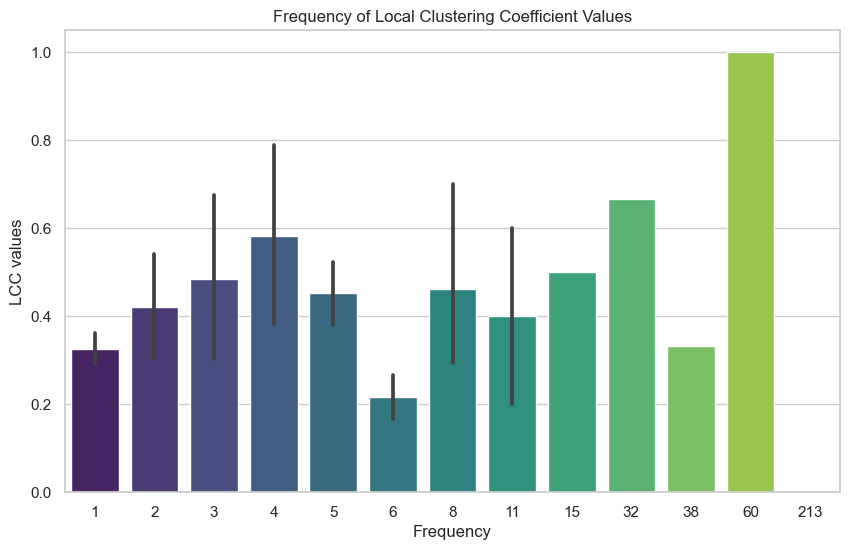

In [22]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Frequency', y='LCC', data=frequency_table, palette='viridis')
ax.set(xlabel='Frequency', ylabel='LCC values', title='Frequency of Local Clustering Coefficient Values')

plt.show()

In [23]:
avg_clustering_coefficient = nx.average_clustering(G)
print(f"Average Clustering Coefficient: {avg_clustering_coefficient:.3f}")

Average Clustering Coefficient: 0.331


In [24]:
global_clustering_coefficient = nx.transitivity(G)
print(f"Global Clustering Coefficient: {global_clustering_coefficient:.3f}")

Global Clustering Coefficient: 0.223


### Similarity (Vertex, Jaccard, Cosine)

In [21]:
def vertex_similarity(graph, node1, node2):
    neighbors1 = set(graph.neighbors(node1))
    neighbors2 = set(graph.neighbors(node2))
    
    common_neighbors = neighbors1.intersection(neighbors2)
    
    similarity = len(common_neighbors)
    return similarity

In [22]:
def jaccard_similarity(graph, node1, node2):
    neighbors1 = set(graph.neighbors(node1))
    neighbors2 = set(graph.neighbors(node2))
    
    intersection_size = len(neighbors1.intersection(neighbors2))
    union_size = len(neighbors1.union(neighbors2))
    
    if intersection_size == 0 or union_size == 0:
        return 0.0
    
    similarity = intersection_size / union_size
    return similarity

In [23]:
def custom_cosine_similarity(graph, node1, node2):
    neighbors1 = set(graph.neighbors(node1))
    neighbors2 = set(graph.neighbors(node2))
    
    common_neighbors = list(neighbors1.intersection(neighbors2))
    
    similarity = len(common_neighbors) / (len(neighbors1)*len(neighbors2))**(0.5)
    
    return similarity

In [24]:
def nodes_description(graph, node1, node2):
    neighbors1 = set(graph.neighbors(node1))
    neighbors2 = set(graph.neighbors(node2))
    
    intersection = neighbors1.intersection(neighbors2)
    union = neighbors1.union(neighbors2)
    
    print(f"Node {node1} neighbors: {neighbors1}")
    print(f"Node {node2} neighbors: {neighbors2}")
    print(f"Nodes neighborhoods intersection: {intersection}")
    print(f"Nodes neighborhoods union: {union}")

In [53]:
random_nodes = random.sample(G.nodes(), 2)
node1 = random_nodes[0]
node2 = random_nodes[1]

nodes_description(G, node1, node2)

Node 362 neighbors: {176, 429, 478}
Node 6 neighbors: {163, 486, 518, 429, 478}
Nodes neighborhoods intersection: {429, 478}
Nodes neighborhoods union: {163, 486, 518, 429, 176, 478}


In [54]:
vertex = vertex_similarity(G, node1, node2)
print(f"Vertex Similarity between Node {node1} and Node {node2}: {vertex:.3f}")

jaccard = jaccard_similarity(G, node1, node2)
print(f"Jaccard Similarity between Node {node1} and Node {node2}: {jaccard:.3f}")

cosine = custom_cosine_similarity(G, node1, node2)
print(f"Cosine Similarity between Node {node1} and Node {node2}: {cosine:.3f}")

Vertex Similarity between Node 362 and Node 6: 2.000
Jaccard Similarity between Node 362 and Node 6: 0.333
Cosine Similarity between Node 362 and Node 6: 0.516


### Assortativity 

Assortativity measures the similarity of connections in the graph with respect to the node degree

In [44]:
assortativity = nx.degree_assortativity_coefficient(G)
print(f"Assortativity: {assortativity:.3f}")

Assortativity: -0.032


# Link Prediction

In [55]:
edges = list(G.edges())
random.shuffle(edges)

split_index = int(0.7 * len(edges))

edges_training = edges[:split_index]
edges_testing = edges[split_index:]

training_graph = G.edge_subgraph(edges_training)
testing_graph = G.edge_subgraph(edges_testing)

print("Training graph:")
print(training_graph)

print("Testing graph:")
print(testing_graph)

Training graph:
Graph with 563 nodes and 1463 edges
Testing graph:
Graph with 427 nodes and 628 edges


In [57]:
list_edges = np.array([{u,v} for u,v in testing_graph.edges()])

In [58]:
positive_datapoints = np.random.choice(list_edges, replace=False, size=400)
positive_datapoints = [(u,v) for u,v in positive_datapoints if training_graph.has_node(u) and training_graph.has_node(v)]
print(f"Number of positive datapoints: {len(positive_datapoints)}")

Number of positive datapoints: 350


In [59]:
negative_datapoints = []
nodes_set = list(testing_graph.nodes())
count = 0
while count < len(positive_datapoints):
    u,v = np.random.choice(nodes_set, size = 2, replace=False)
    if (not training_graph.has_edge(u,v) and training_graph.has_node(u) and training_graph.has_node(v)):
        negative_datapoints.append((u,v))
        count += 1
        
print(f"Number of negative datapoints: {len(negative_datapoints)}")

Number of negative datapoints: 350


In [60]:
dataset_link_prediction =  pd.DataFrame()
datapoints =  positive_datapoints + negative_datapoints
datapoints[:10]

[(289, 90),
 (292, 85),
 (41, 265),
 (305, 339),
 (269, 62),
 (410, 67),
 (509, 39),
 (550, 238),
 (585, 157),
 (265, 611)]

In [61]:
dataset_link_prediction['jaccard'] = [j for _,_, j in nx.jaccard_coefficient(training_graph, datapoints)]
dataset_link_prediction['rai'] = [j for _,_, j in nx.resource_allocation_index(training_graph, datapoints)]
dataset_link_prediction['aai'] = [j for _,_, j in nx.adamic_adar_index(training_graph, datapoints)]
dataset_link_prediction['pref'] = [j for _,_, j in nx.preferential_attachment(training_graph, datapoints)]
dataset_link_prediction['label'] = [1 for _ in range(len(positive_datapoints))] + [0 for _ in range(len(negative_datapoints))]
dataset_link_prediction.head()

,jaccard,rai,aai,pref,label
0,0.227273,0.582827,3.470361,665,1
1,0.000000,0.000000,0.000000,14,1
2,0.037736,0.892857,2.703596,909,1
3,0.666667,0.700000,2.064030,6,1
4,0.000000,0.000000,0.000000,35,1


### Supervised learning

In [62]:
X = dataset_link_prediction[['jaccard', 'rai', 'aai', 'pref']] 
y = dataset_link_prediction['label'] 

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((490, 4), (210, 4), (490,), (210,))

In [65]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Random Forest Classifier

In [68]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

clf = RandomForestClassifier(random_state=123)
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [69]:
best_params

{'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'n_estimators': 100}

In [70]:
y_pred_rf = best_model.predict(X_test_scaled)

In [77]:
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
conf_matrix = confusion_matrix(y_test, y_pred_rf)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.814
Precision: 0.880
Recall: 0.765
F1 Score: 0.819
Confusion Matrix:
[[83 12]
 [27 88]]


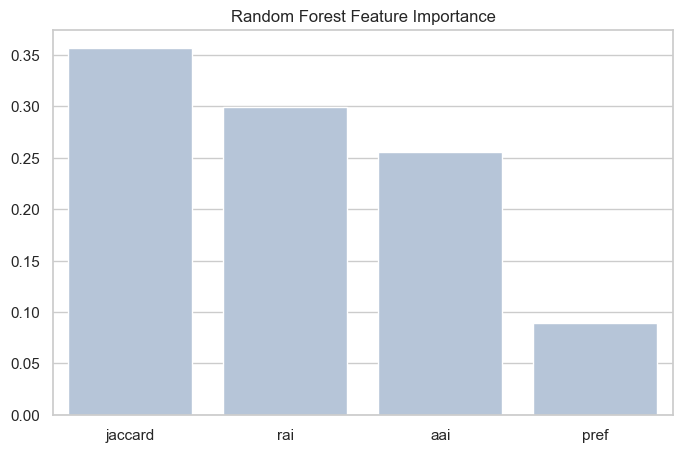

In [81]:
feature_importance = best_model.feature_importances_
features = list(X_train.columns)
sorted_idx = np.argsort(feature_importance)[::-1]

feature_df = pd.DataFrame({'Features': features, 'Importance': feature_importance[sorted_idx]})

sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.barplot(x='Features', y='Importance', data=feature_df, color='lightsteelblue')
plt.title('Random Forest Feature Importance')
plt.xlabel('')
plt.ylabel('')
plt.show()

#### XGBoost

In [75]:
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=123)
xgb_classifier.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=123, ...)

In [78]:
y_pred_xgb = xgb_classifier.predict(X_test_scaled)

In [80]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

print(f"Accuracy: {accuracy_xgb:.3f}")
print(f"Precision: {precision_xgb:.3f}")
print(f"Recall: {recall_xgb:.3f}")
print(f"F1 Score: {f1_xgb:.3f}")
print("Confusion Matrix:")
print(conf_matrix_xgb)

Accuracy: 0.781
Precision: 0.856
Recall: 0.722
F1 Score: 0.783
Confusion Matrix:
[[81 14]
 [32 83]]


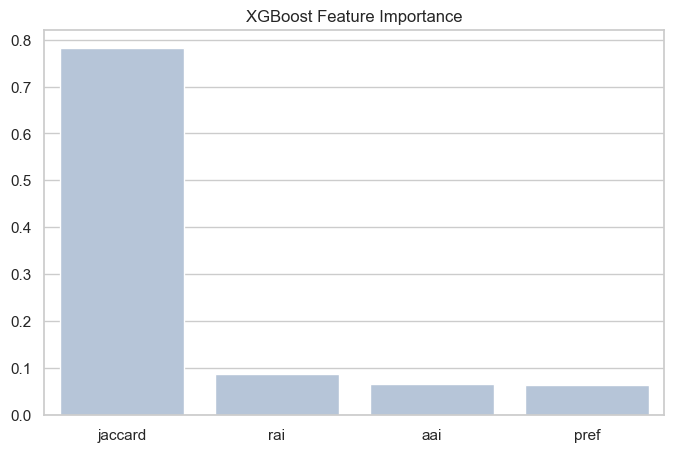

In [82]:
feature_importance_xgb = xgb_classifier.feature_importances_

sorted_idx_xgb = np.argsort(feature_importance_xgb)[::-1]

feature_df_xgb = pd.DataFrame({'Features': features, 'Importance': feature_importance_xgb[sorted_idx_xgb]})

sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.barplot(x='Features', y='Importance', data=feature_df_xgb, color='lightsteelblue')
plt.title('XGBoost Feature Importance')
plt.xlabel('')
plt.ylabel('')
plt.show()

# Community Detection

In [119]:
def draw_network_colored(graph, p, color_for_nodes, nodesize = 400):
    plt.figure(figsize = (20,15))
    nx.draw_networkx(graph,
                     pos=p,
                     font_size = 8, 
                     font_weight = 'bold',
                     font_color = 'navy',
                     edge_color = 'grey')
    
    nodes = nx.draw_networkx_nodes(graph, p, node_color=[color_for_nodes[n] for n in graph.nodes()], node_size = nodesize)
                     
    nodes.set_edgecolor('lightgrey')
    plt.axis('off')
    plt.show()
    
get_color_list = lambda ncolors, cmap : mcp.gen_color(cmap=cmap, n=ncolors)

### Greedy algorithm

In [60]:
greedy_communities = list(greedy_modularity_communities(G))

greedy_modularity_value = modularity(G, greedy_communities)
print(f"Network Modularity (Greedy algorithm): {greedy_modularity_value:.3f}")

greedy_num_partitions = len(greedy_communities)
greedy_partition_sizes = [len(community) for community in greedy_communities]
greedy_partition_sizes.sort(reverse=True)

print(f"Number of partitions (communities) obtained by Greedy algorithm: {greedy_num_partitions}")
print(f"Size of each partition: {greedy_partition_sizes}")

Network Modularity (Greedy algorithm): 0.631
Number of partitions (communities) obtained by Greedy algorithm: 22
Size of each partition: [164, 72, 53, 44, 38, 37, 33, 31, 31, 30, 17, 17, 13, 6, 6, 6, 5, 5, 5, 3, 2, 2]


In [117]:
greedy_dict = defaultdict(int)
comm_key = 1
for community in greedy_communities:
    for node in community:
        greedy_dict[node] = comm_key
    comm_key +=1

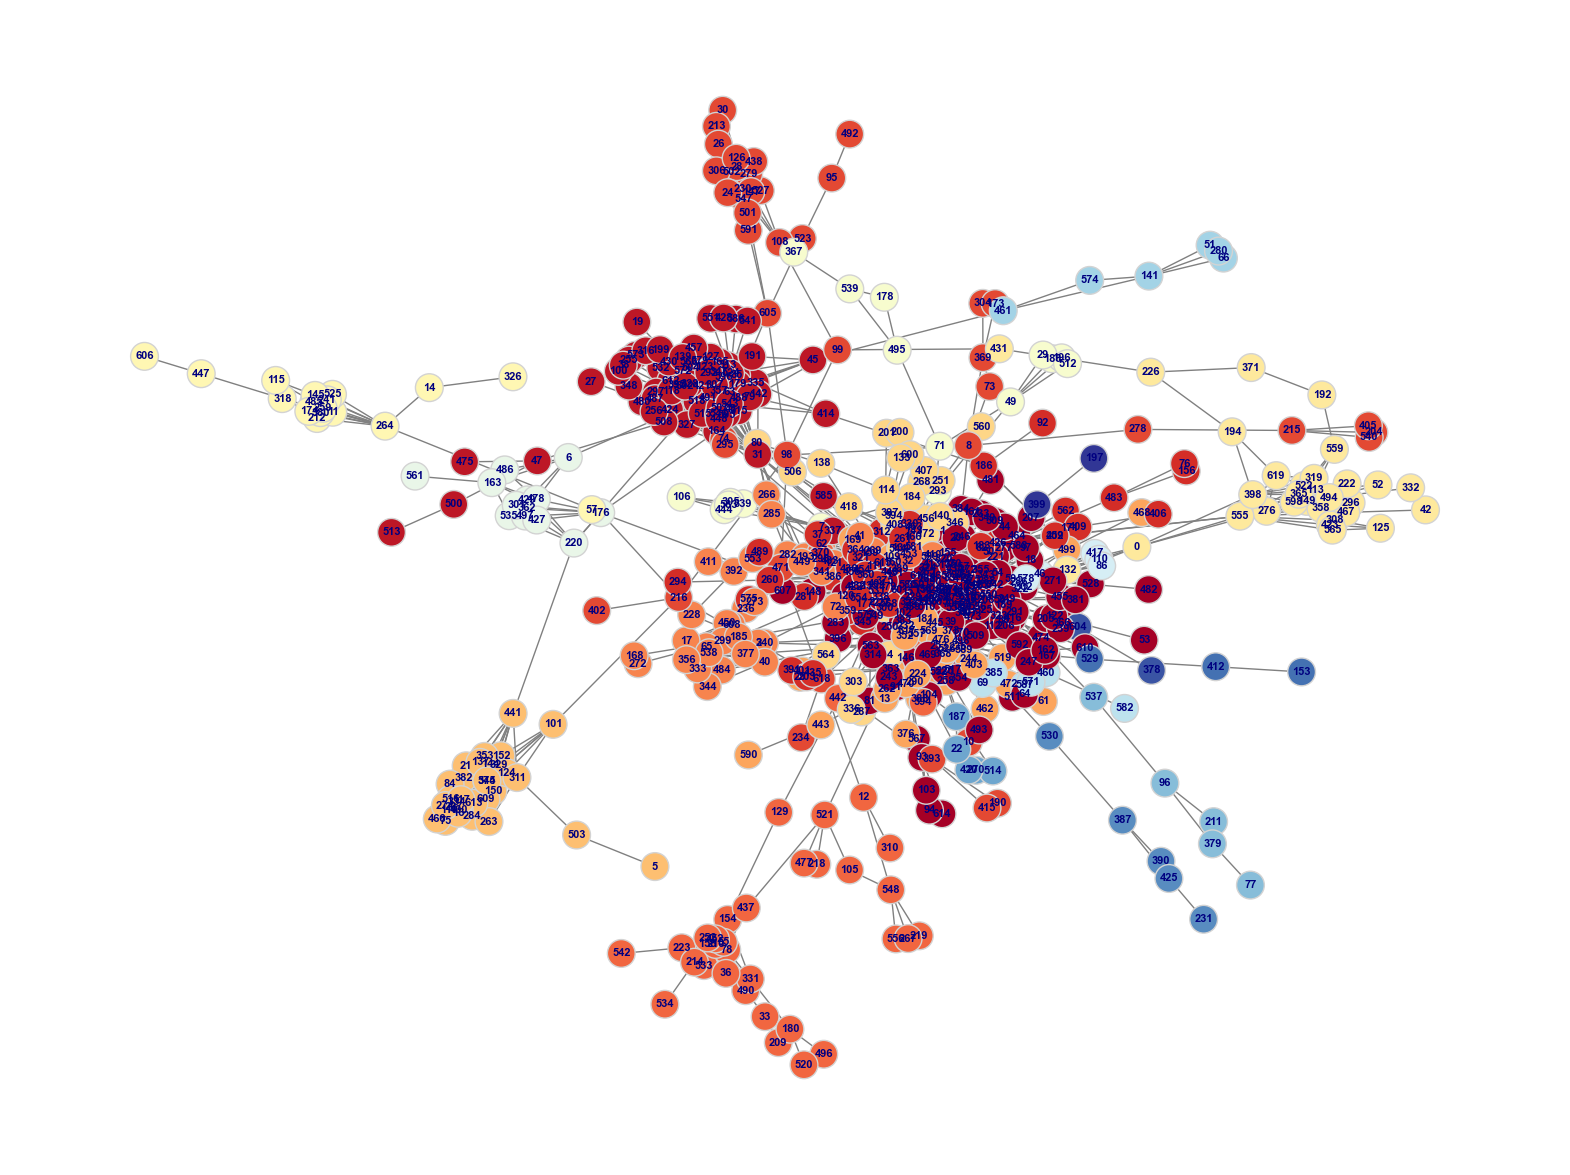

In [121]:
greedy_part = set(greedy_dict.values())
colors = {comm: c for comm, c in zip(greedy_part, get_color_list(len(greedy_part), 'RdYlBu' ))}
colors_for_node_greedy = {node: colors[c] for node, c in greedy_dict.items()}
draw_network_colored(G, p, colors_for_node_greedy)

### Louvain algorithm

In [63]:
louvain_partitions = louvain_communities(G, seed=12345)

louvain_modularity_value = modularity(G, louvain_partitions)
print(f"Network Modularity (Louvain algorithm): {louvain_modularity_value:.3f}")

louvain_num_partitions = len(louvain_partitions)
louvain_partition_sizes = [len(community) for community in louvain_partitions]
louvain_partition_sizes.sort(reverse=True)

print(f"Number of partitions (communities) obtained by Louvain algorithm: {louvain_num_partitions}")
print(f"Size of each partition: {louvain_partition_sizes}")

Network Modularity (Louvain algorithm): 0.651
Number of partitions (communities) obtained by Louvain algorithm: 19
Size of each partition: [145, 71, 46, 37, 37, 35, 34, 34, 31, 30, 29, 21, 21, 17, 17, 6, 5, 2, 2]


In [122]:
louvain_dict = defaultdict(int)
commun_key = 1
for community in louvain_partitions:
    for node in community:
        louvain_dict[node] = commun_key
    commun_key +=1

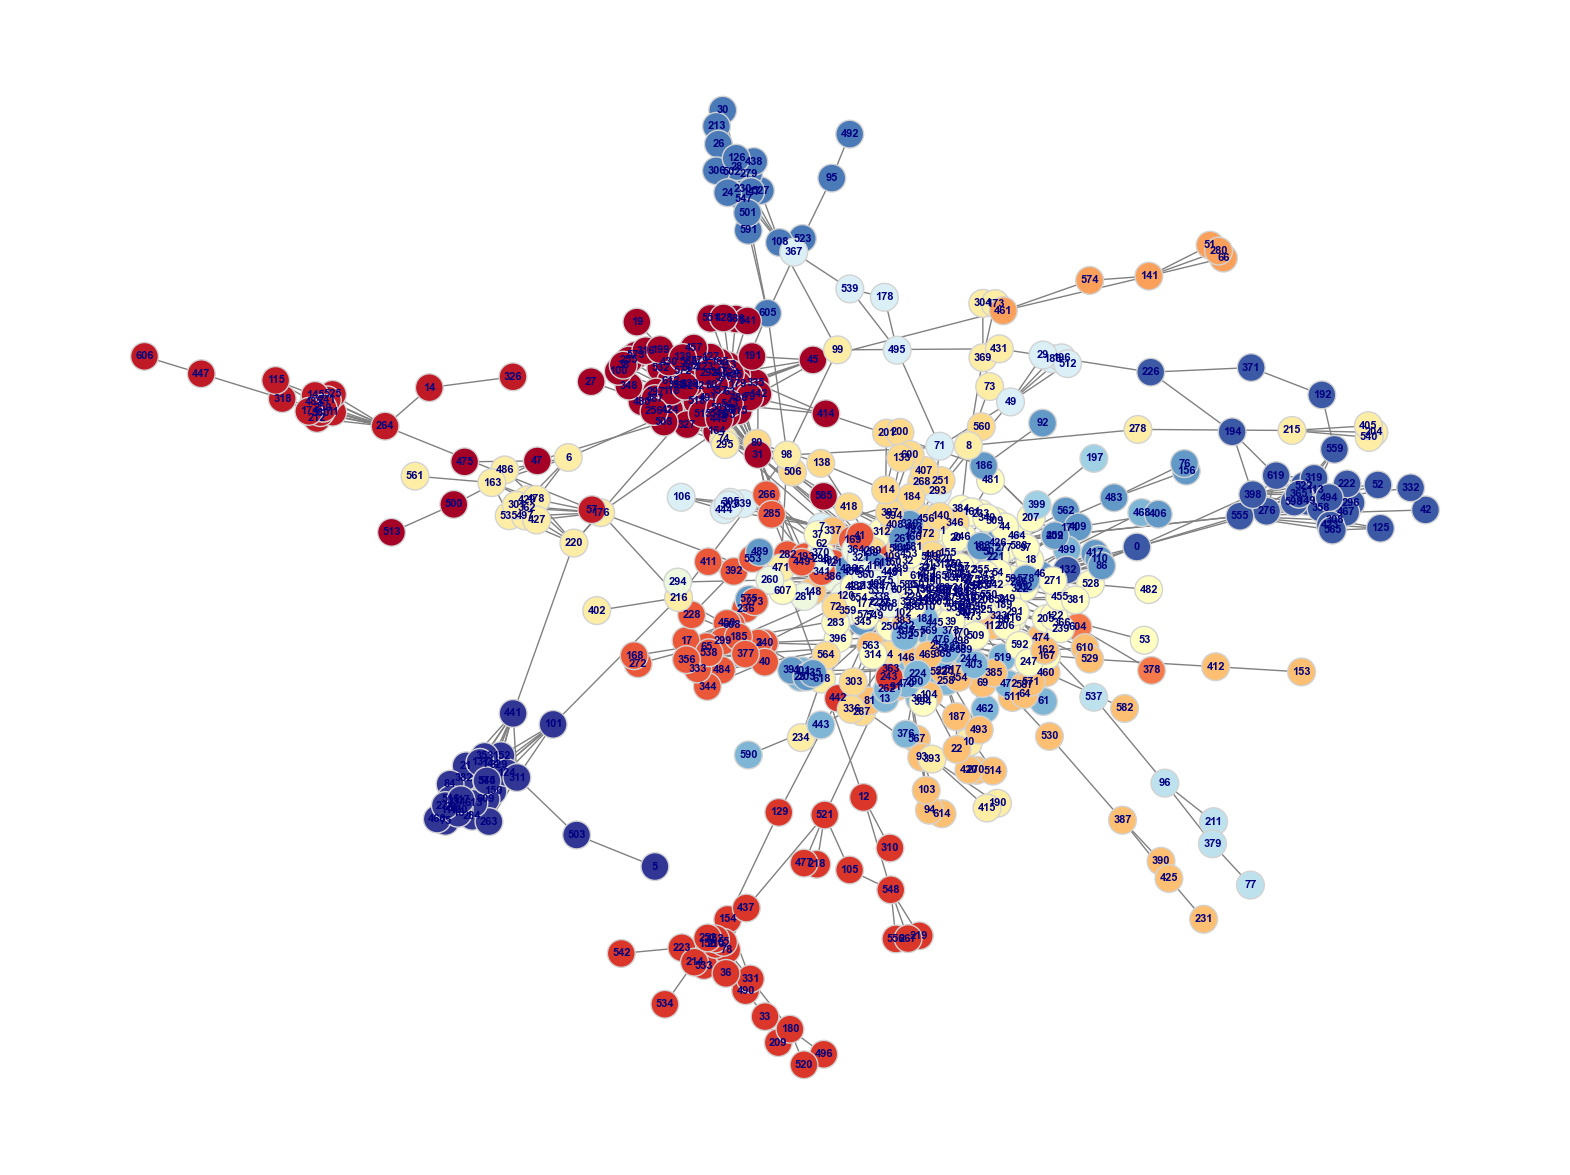

In [123]:
louvain_part = set(louvain_dict.values())
colors = {comm: c for comm, c in zip(louvain_part, get_color_list(len(louvain_part), 'RdYlBu' ))}
colors_for_node_louvain = {node: colors[c] for node, c in louvain_dict.items()}
draw_network_colored(G, p, colors_for_node_louvain)

### Infomap

In [92]:
infomap = Infomap()
for edge in G.edges():
    infomap.add_link(*edge)

infomap.run()
infomap_communities = {}
for node in infomap.tree:
    if node.is_leaf:
        infomap_communities[node.node_id] = node.module_id

In [106]:
infomap_partition_sizes = defaultdict(int)
for node, community in infomap_communities.items():
    infomap_partition_sizes[community] += 1

print(f"Size of each partition obtained by Infomap: {infomap_partition_sizes}")

Size of each partition obtained by Infomap: defaultdict(<class 'int'>, {1: 422, 2: 90, 3: 76, 4: 32})


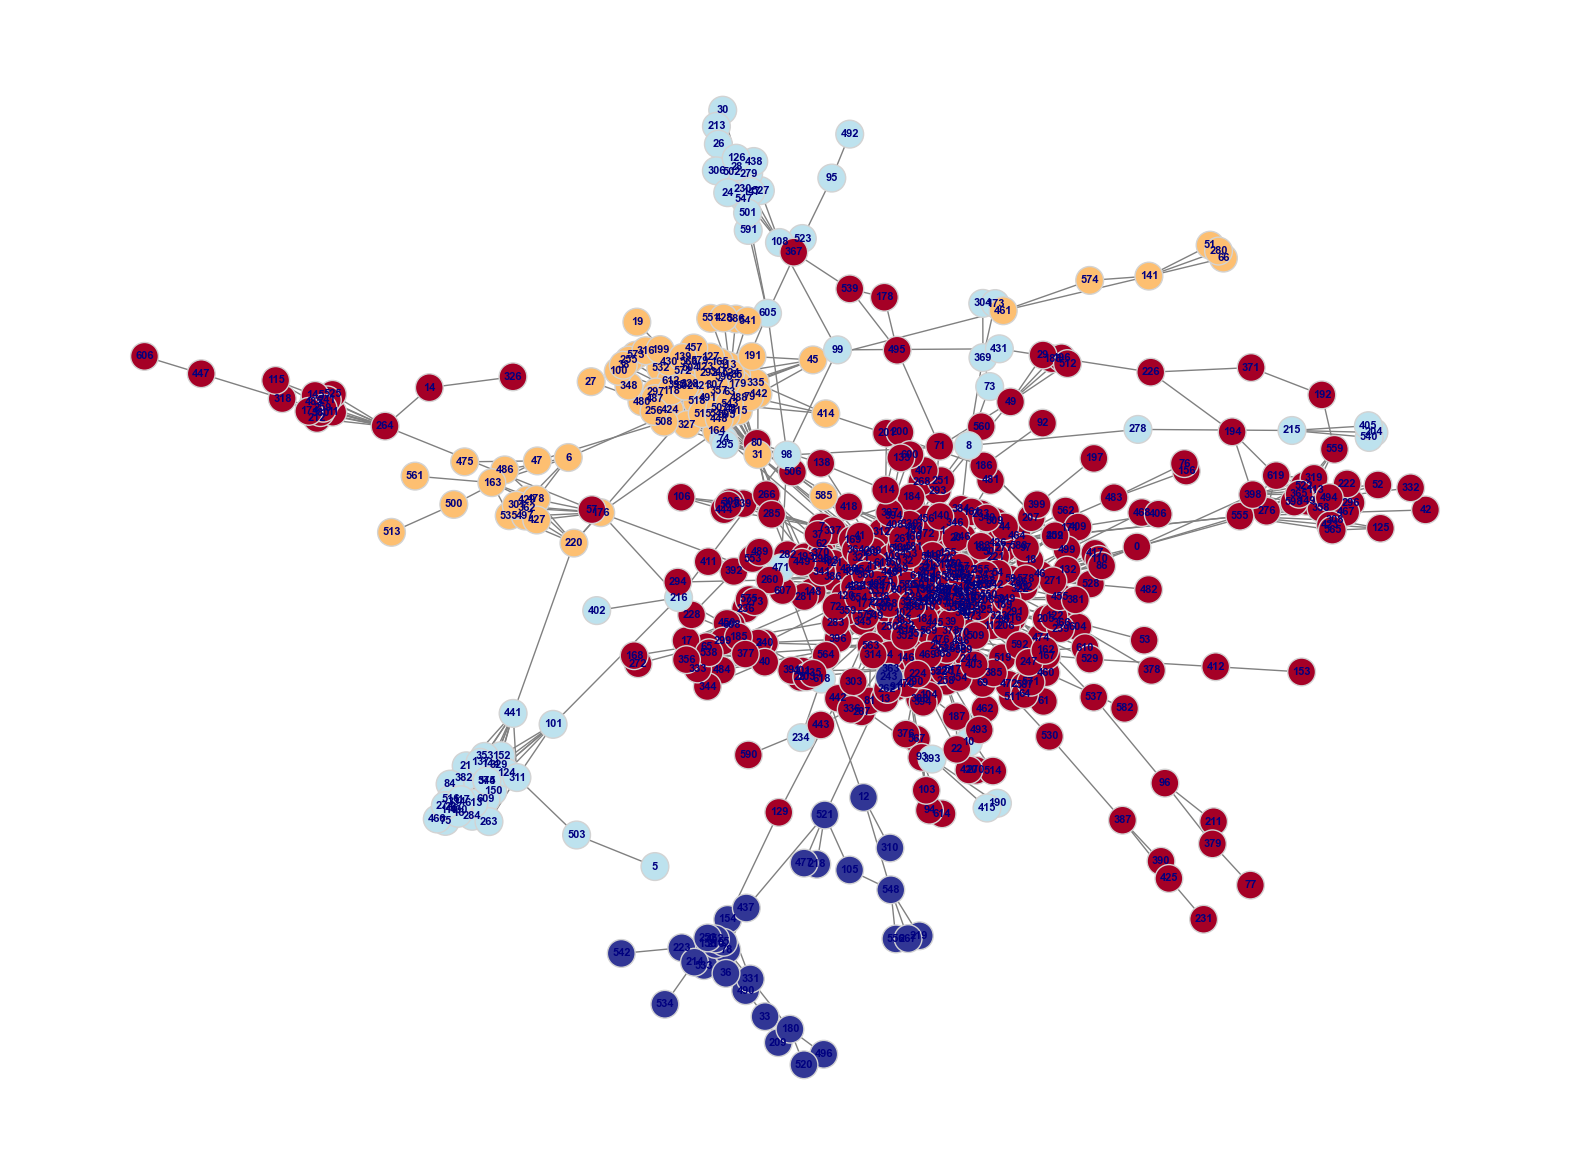

In [120]:
infomap_partitions = set(infomap_communities.values())
colors = {comm: c for comm, c in zip(infomap_partitions, get_color_list(len(infomap_partitions), 'RdYlBu' ))}
colors_for_node_infomap = {node: colors[c] for node, c in infomap_communities.items()}
draw_network_colored(G, p, colors_for_node_infomap)